In [1]:
%run getData.py

In [6]:
import numpy as np
from sklearn import preprocessing, cluster, model_selection, svm
import matplotlib.pyplot as plt

class Classifier(object):
    def __init__(self, microDataLoc, clusterNum=3, macroDataLoc="data/clusterData.txt"):
        self.microDataLoc = microDataLoc
        self.macroDataLoc = macroDataLoc
        self.clusterNum = clusterNum

    def cluster(self):
        data = np.loadtxt(self.macroDataLoc)
        cleanData = preprocessing.scale(data)
        kmeans = cluster.KMeans(n_clusters=self.clusterNum, random_state=11).fit(cleanData)
        groupNum = np.array(kmeans.labels_)
        return groupNum

    def prepareData(self):
        data = np.loadtxt(self.microDataLoc)
        groupNum = self.cluster()
        group, label = [], []
        for i in range(self.clusterNum):
            group.append(data[groupNum==i, :-1])
            label.append(data[groupNum==i, -1])
        return (group, label)

    def trainTestSplit(self):
        train, test, trainLabel, testLabel = [], [], [], []
        group, label = self.prepareData()
        for i in range(self.clusterNum):
            trainData, testData, trainLabelData, testLabelData = model_selection.train_test_split(group[i],
                    label[i], test_size=0.3, random_state=11)
            train.append(trainData)
            test.append(testData)
            trainLabel.append(trainLabelData)
            testLabel.append(testLabelData)
        return (train, test, trainLabel, testLabel)
            
    def train(self):
        pass        

    def test(self):
        clf, test, testLabel = self.train()
        error = []
        for i in range(self.clusterNum):
            pred = (clf[i].predict(test[i]) == 1)
            caseError = sum([i != j for (i,j) in zip(testLabel[i], pred)])
            error.append(float(caseError)/len(pred))
        return error

    def reportResult(self):
        error = self.test()
        for i in range(self.clusterNum):
            print("Group no:" + str(i+1) + "\ncorrect rate")
            print(1-error[i])
        
        x_labels = [str(i+1) for i in range(self.clusterNum)]
        plt.bar(x_labels, 1-np.array(error))
        plt.xlabel("Group Number")
        plt.ylabel("Correct Rate")
        plt.title("Performance of Decision Tree with Clustering")
        plt.ylim([0, 1])
        
        plt.savefig("decision_tree_clustering.png")
        plt.show()
        print('\n')
        return error


In [7]:
from sklearn import tree
from sklearn.tree import export_graphviz
import numpy as np
import pydotplus

Cluster no:1

Group no:1
correct rate
0.5192307692307692


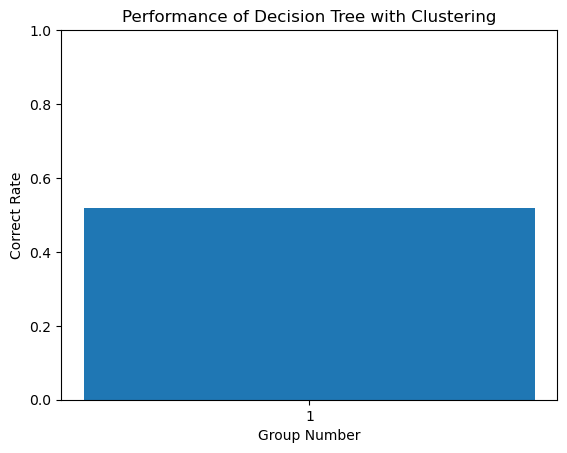



Cluster no:2

Group no:1
correct rate
0.5915492957746479
Group no:2
correct rate
0.4545454545454546


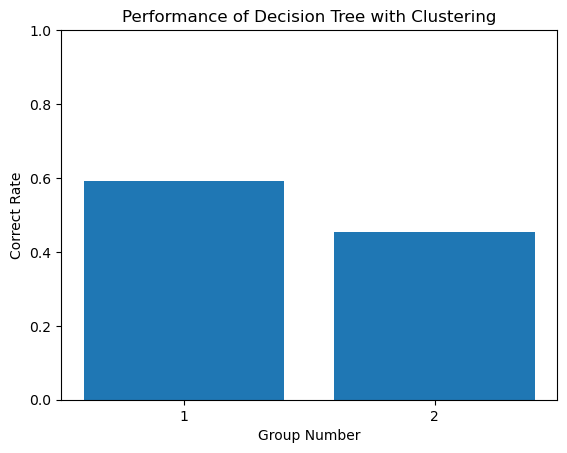



Cluster no:3

Group no:1
correct rate
0.47058823529411764
Group no:2
correct rate
0.7142857142857143
Group no:3
correct rate
0.48


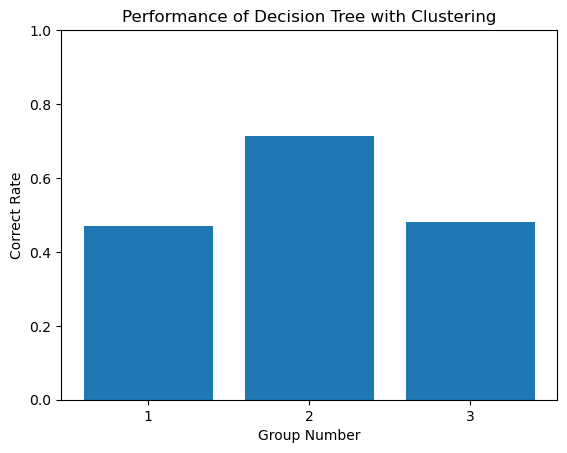



Cluster no:4

Group no:1
correct rate
0.6363636363636364
Group no:2
correct rate
0.5217391304347826
Group no:3
correct rate
0.42105263157894735
Group no:4
correct rate
0.5909090909090908


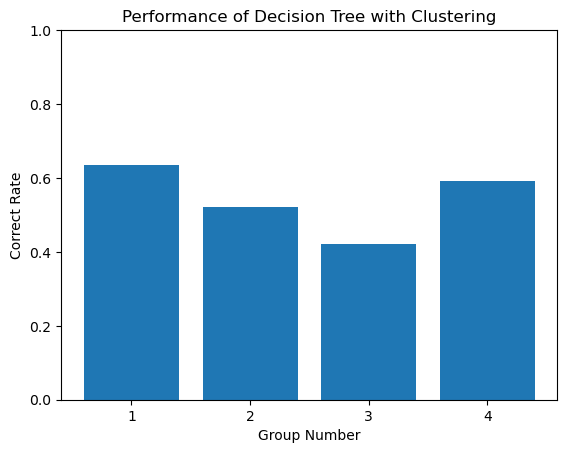

In [9]:
class DecisionTreeStockPrediction(Classifier):
    
    def __init__(self, microDataLoc, clusterNum=3, macroDataLoc="data/clusterData.txt"):
        Classifier.__init__(self, microDataLoc, clusterNum, macroDataLoc)
    
    def visualize(self, clf):
        dot_data = export_graphviz(clf, out_file=None, feature_names=self.features, class_names=self.labels, filled=True, rounded=True, special_characters=True)
        graph = pydotplus.graph_from_dot_data(dot_data)
        graph.write_pdf("decision_tree.pdf")
        return graph

    def train(self):
        train, test, trainLabel, testLabel = self.trainTestSplit()
        clf = [tree.DecisionTreeClassifier() for i in range(self.clusterNum)]
        for i in range(self.clusterNum):
            clf[i].fit(train[i], trainLabel[i])
            self.features = [str(j+1) for j in range(train[i].shape[1])]
            self.labels = [str(k) for k in np.unique(trainLabel[i])]
            self.visualize(clf[i])  
        return (clf, test, testLabel) 
if __name__ == "__main__":

    print("Cluster no:1\n")
    # Case when 1 cluster
    apple = DecisionTreeStockPrediction("data/appleTrainData.txt", clusterNum=1)
    apple.reportResult()
    
    # Case when 2 clusters
    print("Cluster no:2\n")
    apple = DecisionTreeStockPrediction("data/appleTrainData.txt", clusterNum=2)
    apple.reportResult()
    
    # for the case when cluster = 3
    print("Cluster no:3\n")
    apple = DecisionTreeStockPrediction("data/appleTrainData.txt", clusterNum=3)
    apple.reportResult()
        
    
    print("Cluster no:4\n")
    # Case when 4 clusters
    apple = DecisionTreeStockPrediction("data/appleTrainData.txt", clusterNum=4)
    apple.reportResult()
    

In [10]:
clf, _, _ = apple.train()
apple.visualize(clf[0])